Introduction

In this final challenge, you will put into practice some of the key principles and techniques you have learned in the course.

The challenge does not include specific step-by-step instructions, so you must interpret the requirements and perform the necessary tasks to build, test, and optimize your model. After you have created your model, you are required to enter the predicted labels for a test dataset that is provided in the lab files for this course so that your model's performance can be graded. The challenge accounts for 50% of your overall grade.
Challenge Overview

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

In this project, you must tackle three challenges:

    Challenge 1: Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
    Challenge 2: Build a classification model to predict customer purchasing behavior.
    Challenge 3: Build a regression model to predict customer purchasing behavior.



About the Data

This data consists of three files, containing data that was collected on January 1st 1998.

Download the dataset here.
AdvWorksCusts.csv

Customer demographic data consisting of the following fields:

    1. CustomerID (integer): A unique customer identifier.
    2. Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
    3. FirstName (string): The customer's first name.
    4. MiddleName (string): The customer's middle name.
    5. LastName (string): The customer's last name.
    6. Suffix (string): A suffix for the customer name (Jr, Sr, etc.)
    7. AddressLine1 (string): The first line of the customer's home address.
    8. AddressLine2 (string): The second line of the customer's home address.
    9. City (string): The city where the customer lives.
    10. StateProvince (string): The state or province where the customer lives.
    11. CountryRegion (string): The country or region where the customer lives.
    12. PostalCode (string): The postal code for the customer's address.
    13. PhoneNumber (string): The customer's telephone number.
    14. BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.
    15.Education (string): The maximum level of education achieved by the customer:
        Partial High School
        High School
        Partial College
        Bachelors
        Graduate Degree
    16. Occupation (string): The type of job in which the customer is employed:
        Manual
        Skilled Manual
        Clerical
        Management
        Professional
    17. Gender (string): The customer's gender (for example, M for male, F for female, etc.)
    18. MaritalStatus (string): Whether the customer is married (M) or single (S).
    19 .HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).
    20. NumberCarsOwned (integer): The number of cars owned by the customer.
    21. NumberChildrenAtHome (integer): The number of children the customer has who live at home.
    22. TotalChildren (integer): The total number of children the customer has.
    23. YearlyIncome (decimal): The annual income of the customer.

AW_AveMonthSpend.csv

Sales data for existing customers, consisting of the following fields:

    1. CustomerID (integer): The unique identifier for the customer.
    2. AveMonthSpend (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

AW_BikeBuyer.csv

Sales data for existing customers, consisting of the following fields:

    1. CustomerID (integer): The unique identifier for the customer.
    2. BikeBuyer (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).




Challenge 1: Data Exploration

To complete this challenge:

   1.Download the Adventure Works data files - see previous unit.
   
   2.Clean the data by replacing any missing values and removing duplicate rows. In this dataset, each customer is identified by a unique customer ID. The most recent version of a duplicated record should be retained.
   
   3.Explore the data by calculating summary and descriptive statistics for the features in the dataset, calculating correlations between features, and creating data visualizations to determine apparent relationships in the data.
   
   4.Based on your analysis of the customer data after removing all duplicate customer records, answer the questions below.

Load and prepare the data set

As a first step you must load the dataset.

Execute the code in the cell below to load the packages required for the rest of this notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [3]:
Customer = pd.read_csv('AdvWorksCusts.csv',header='infer')#the data has headers
AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv', header='infer')
BikeBuyer = pd.read_csv('AW_BikeBuyer.csv', header='infer')

Customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [4]:
AveMonthSpend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [5]:
BikeBuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


first lets beging with merging all the data frames, through de CustomerID feature

In [6]:
df=pd.merge(Customer, AveMonthSpend, on='CustomerID')
df=pd.merge(df, BikeBuyer, on='CustomerID')
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


lets remove the features that is unnecesary, like Title, FirstName, MiddleName, LastName, Suffix, Addressline1, Addressline2, Phone Number

In [7]:
columns = ['Title', 'FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','PhoneNumber']
df.drop(columns, inplace=True, axis=1)
df.head()

,CustomerID,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Rockhampton,Queensland,Australia,4700,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Seaford,Victoria,Australia,3198,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Hobart,Tasmania,Australia,7001,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,North Ryde,New South Wales,Australia,2113,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Wollongong,New South Wales,Australia,2500,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


lets check if there is any NaN

In [8]:
(df.astype(np.object) == 'NaN').any()

CustomerID              False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
dtype: bool

lets check the type of data of each column

In [9]:
df.dtypes

CustomerID               int64
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

Enter the following summary statistics you calculated for the AveMonthSpend column.

In [10]:
df['AveMonthSpend'].describe()

count    17209.000000
mean        72.494625
std         27.374399
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

In [11]:
df['AveMonthSpend'].median()

68.0

The distribution of the values in the BikeBuyer column indicates

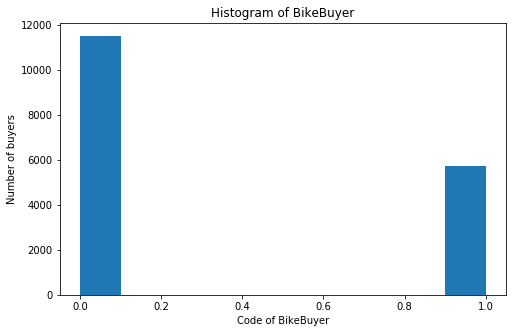

In [13]:
df['BikeBuyer'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of BikeBuyer') # add a title to the histogram
plt.ylabel('Number of buyers') # add y-label
plt.xlabel('Code of BikeBuyer') # add x-label

plt.show()

Select the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation:
Clerical, Manual, Skilled Manual, Professional, Management

In [24]:
df_aux1=df[['Occupation','YearlyIncome']]
df_aux2=df_aux1.groupby(['Occupation'],as_index=False).median()
df_aux2

,Occupation,YearlyIncome
0,Clerical,49055
1,Management,118780
2,Manual,21740
3,Professional,98955
4,Skilled Manual,66528


Based on their age at the time when the data was collected (1st January 1998),

which group of customers accounts for the highest AveMonthSpend values?

In [60]:
s = pd.to_datetime(df['BirthDate'])
age = (pd.to_datetime('01/01/1998') - pd.to_datetime(s)).astype('<m8[Y]')
df['Age']=age

#esfuerzos[esfuerzos['Bar/Point/Case'].str.contains(barra)]
df_aux1=df[['Gender','Age','AveMonthSpend']]
#planets['year'] == 2008
df_aux1M=df_aux1[df_aux1['Gender']=='M']
df_aux1F=df_aux1[df_aux1['Gender']=='F']
df_aux1M=df_aux1M[['Age','AveMonthSpend']]
df_aux1F=df_aux1F[['Age','AveMonthSpend']]


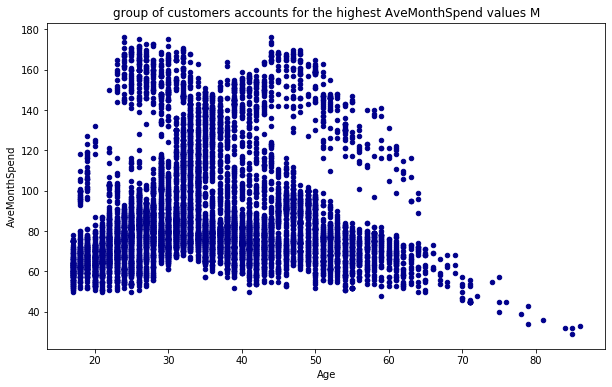

In [61]:
df_aux1M.plot(kind='scatter', x='Age', y='AveMonthSpend', figsize=(10, 6), color='darkblue')

plt.title('group of customers accounts for the highest AveMonthSpend values M')
plt.xlabel('Age')
plt.ylabel('AveMonthSpend')

plt.show()

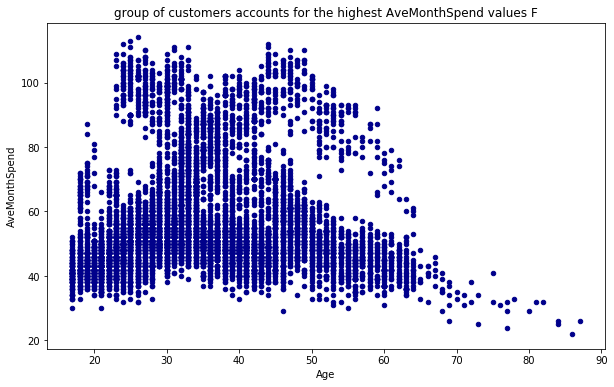

In [62]:
df_aux1F.plot(kind='scatter', x='Age', y='AveMonthSpend', figsize=(10, 6), color='darkblue')

plt.title('group of customers accounts for the highest AveMonthSpend values F')
plt.xlabel('Age')
plt.ylabel('AveMonthSpend')

plt.show()

Which of the following statements about AveMonthSpend are true?
1. Married customers have a higher median AvgMonthSpend than single customers.
2. Customers with no car have a higher median AvgMonthSpend than customers with three or more cars.
3. Male customers have a higher median AvgMonthSpend than female customers.
4. Female customers have a wider range of AvgMonthSpend values than male customers.=False, see the above graphic
5. Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.

In [63]:
#1. Married customers have a higher median AvgMonthSpend than single customers.=True
df_aux1=df[['MaritalStatus','AveMonthSpend']]
df_aux2=df_aux1.groupby(['MaritalStatus'],as_index=False).median()
df_aux2

,MaritalStatus,AveMonthSpend
0,M,74
1,S,62


In [64]:
#2. Customers with no car have a higher median AvgMonthSpend than customers with three or more cars.=False
df_aux1=df[['NumberCarsOwned','AveMonthSpend']]
df_aux2=df_aux1.groupby(['NumberCarsOwned'],as_index=False).median()
df_aux2

,NumberCarsOwned,AveMonthSpend
0,0,65
1,1,64
2,2,64
3,3,92
4,4,100


In [65]:
#3. Male customers have a higher median AvgMonthSpend than female customers.=True
df_aux1=df[['Gender','AveMonthSpend']]
df_aux2=df_aux1.groupby(['Gender'],as_index=False).median()
df_aux2

,Gender,AveMonthSpend
0,F,52
1,M,79


In [66]:
#5. Customers with no children at home have a lower median AvgMonthSpend values than customers 
#with one or more children at home.=True
df_aux1=df[['NumberChildrenAtHome','AveMonthSpend']]
df_aux2=df_aux1.groupby(['NumberChildrenAtHome'],as_index=False).median()
df_aux2

,NumberChildrenAtHome,AveMonthSpend
0,0,57.0
1,1,69.0
2,2,79.0
3,3,89.0
4,4,107.5
5,5,109.0


Which of the following statements about BikeBuyer are true?
1. The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.
2. The median number of cars owned by customers who bought a bike is lower than for customers who didn't.
3. The most common occupation type for customers who bought a bike is skilled manual.
4. Male customers are more likely to buy bikes than female customers.
5. A maried customer is more likely to buy a bike.

In [67]:
#1. The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.=True
df_aux1=df[['BikeBuyer','YearlyIncome']]
df_aux2=df_aux1.groupby(['BikeBuyer'],as_index=False).median()
df_aux2

,BikeBuyer,YearlyIncome
0,0,65955.5
1,1,96273.0


In [68]:
#2. The median number of cars owned by customers who bought a bike is lower than for customers who didn't.=False
df_aux1=df[['BikeBuyer','NumberCarsOwned']]
df_aux2=df_aux1.groupby(['BikeBuyer'],as_index=False).median()
df_aux2

,BikeBuyer,NumberCarsOwned
0,0,1
1,1,2


In [70]:
#3. The most common occupation type for customers who bought a bike is skilled manual.=False
df_aux1=df[df['BikeBuyer']==1]
df_aux2=df_aux1.groupby(['Occupation'],as_index=False).count()
df_aux2

,Occupation,CustomerID,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,Clerical,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658
1,Management,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
2,Manual,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511
3,Professional,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316
4,Skilled Manual,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176


In [71]:
#4. Male customers are more likely to buy bikes than female customers.=True
df_aux1=df[df['BikeBuyer']==1]
df_aux2=df_aux1.groupby(['Gender'],as_index=False).count()
df_aux2

,Gender,CustomerID,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,F,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334
1,M,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371


In [72]:
#5. A maried customer is more likely to buy a bike.=False
df_aux1=df[df['BikeBuyer']==1]
df_aux2=df_aux1.groupby(['MaritalStatus'],as_index=False).count()
df_aux2

,MaritalStatus,CustomerID,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Occupation,Gender,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,M,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320
1,S,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385
